In [111]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# Mechanics Lab 4 -- Simple Pendulum, introducing odeint

Over the last two weeks, we showed how numerical integration can be implemented with a Simple Euler or Improved Euler method.  More sophisticated algorithms achieve higher accuracy by using more terms in the Taylor series approximation in taking the next step.  (For example, one such easily-coded algorithm is the 4th-order Runge-Kutta, described in the separate text document called Using Python to Solve ODEs).  Today we'll introduce the higher-accuracy, ordinary differential equation solver included in python, *odeint.* We will apply it to the non-linear problem on a simple pendulum.

## Objectives

In this lab you will 
* learn how to use *odeint* to solve ordinary differential equations;
* model the motion of a simple pendulum;
* determine how the period of a simple pendulum depends on the release angle.

## Odeint

The differential equation solver, *odeint* https://docs.scipy.org/doc/scipy-0.18.1/reference/generated/scipy.integrate.odeint.html, is part of the scipy package, which must be loaded at run time using the command. Rather than appending each new r-list (list of generalized positions and velocities) to a solution, this solver takes a vector of time points as its argument and outputs a vector of r-lists, thus eliminating the For loop we used in the previous lab.  You will no longer be building up the solution by repeated appending to an empty list; instead, the ODEINT solver will output the entire solution as a vector of r-lists, evaluated at the time vector t.

*For an outline of what we'll do for the rest of the semester, refer to the document *Using Python to Solve ODEs*.*

## Simple Pendulum: theory


We'll apply this new method to a familiar situation:  the simple pendulum. The simple pendulum is a classic example of a nonlinear system. It is, therefore, a good system to solve numerically, as you will do below.

### Period of pendulum released from small angles

#### Exercise 4.1

Let's look at a simple pendulum of length = 2.000 m.  Assuming local g = 9.803 m/s^2, **calculate** the period it ought have for small oscillations.  Enter your result to 3 significant figures below.

**Period of 2.000 m long pendulum for small oscillations = 2*pi*sqrt(l/g)=2.838 s

### Simple pendulum equation of motion for arbitrary angles with possible damping
You'll recall that the usual expression for the simple pendulum makes a small angle approximation, whereby 
$sin(\theta)\approx \theta$.  Let's relax that requirement, in order to get an equation of motion that is valid for any angle.

#### Exercise 4.2
Work through the following analytic derivation on a separate sheet of paper. **Staple it to the back of the notebook you turn in.**

* Starting with Newton's 2nd Law in angular form, $\sum \vec{\tau}= I\vec{\alpha}$, with $\tau = \vec{r}\times\vec{F}$, determine the restoring torque for a simple pendulum (just a point mass m on a frozen massless string):

* Write down the moment of inertia of a point mass at radius equal to the length of the pendulum: 

* The second derivative of the angle is a function of the angle.  Write it down.

* What additional force (torque) term would need to go on the force (torque) side of the equation to account for damping?



## Simple Pendulum: numerical solution for $\theta(t)$  

Now that you have the equation of motion for a simple pendulum released from an arbitrary angle, you will use *odeint* to numerically solve it and find the angle as a function of time.

#### Exercise 4.3
The following code block is missing a few pieces, which you'll have to supply.  In particular, the function that evaluates the derivatives needs some work.  We'd like you to supply those missing pieces and create these four **labeled** plots for zero damping. Mass m = 1.5 kg, length l =2.000 m. The pendulum  starts from rest at 5 degrees from the vertical:

    1. Pendulum angle vs. time
    2. Pendulum angular velocity vs. time
    3. Pendulum angular velocity vs. pendulum angle (for small angles)
    4. Kinetic energy (red), Potential energy (blue), Total Energy (green) vs. time
    
*Hint: how should the total energy behave as a function of time, if there is no damping in the system?  This result for total energy will be a powerful check on your values of potential energy and kinetic energy.*



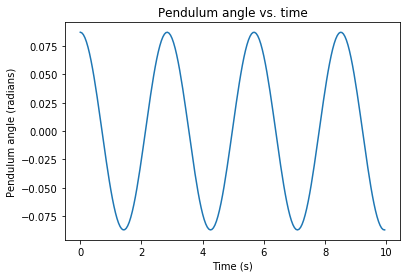

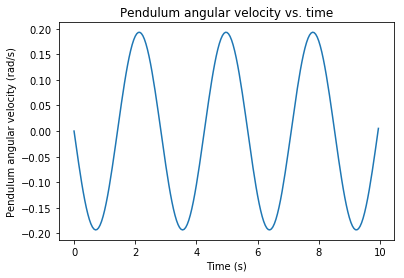

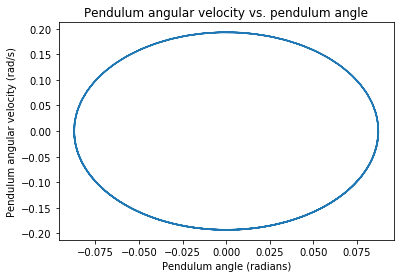

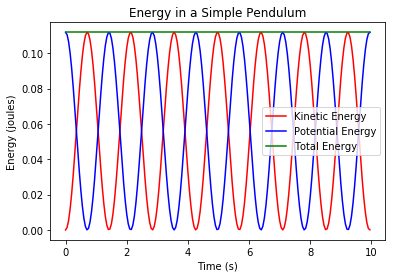

In [112]:
# Simple pendulum at arbitrary angle

from scipy.integrate import odeint  #the differential equation integrator
# To reduce demand on memory, we import only a subset of the scipy package

# Set the global variables
#length of pendulum, in meters
length = 2.0 ### FIX
# mass of pendulum (may not drop out because of damping force)
m = 1.5 ### FIX
#local gravitational acceleration in m/s^2
g = 9.803 ### FIX
#optional damping parameter, such that the damping force is -(gamma_damp)*v
gamma_damp = 0.00 ### FIX


#Create the time array for the solution.  Just 10 seconds will be enough to illustrate the technique for now
delta_t = 0.05   #time step of integration
tend = 10
time = arange(0.0,tend,delta_t)

# Set the initial conditions
#starting angle, in degrees
start_angle_degrees = 5## FIX
start_angle_radians = start_angle_degrees*pi/180.0
rinit = array([start_angle_radians, 0],float) #Start at rest at start_angle, after converting to radians

# As usual, create a function to evaluate the derivatives
def deriv(r,t): 
    Theta = r[0]        #unpack the r-list for the angle
    ThetaDot = r[1]     #unpack the r-list for the angular velocity
   
    dThetadt = ThetaDot        #replace 0 with the appropriate expression from Exercise 3.2
                        # Hint:  this is simpler than you think--refer to Using Python to Solve ODEs
        
    dThetaDotdt = ((-g)/length)*sin(Theta) -(gamma_damp*ThetaDot)    #replace 0 with the appropriate expression from Exercise 3.2,
                        #including the drag force (torque).
    return array([dThetadt,dThetaDotdt],float)

#This is it, the Python ODE solver, all in one line:
r=odeint(deriv, rinit, time) #integrate to get the solution vector r at all points in time
                             #in which variable r[0] is the angle
                             #and variable r[1] is the angular velocity
                             #The solution can be sliced apart as needed:  
                             #  Theta solution for all time for all time is r[:,0]
                             #  ThetaDot solution is r[:,1]
                    
                    
# Placeholder (reminder) that when you're done, you'll need to make a solution vector of KE, PE, and total E
# for plot #4.  In order to be able to plot, we've prefilled this with *nonsense* copies of the time vector,
# which at least will be the correct length:
# KE = 1.0*time.copy()

# using KE equation
KE = 0.5*m*(length**2)*(r[:,1])**2

#PE = 2.0*time.copy()
#Using Potential Energy

PE = m*g*length*(1-cos(r[:,0]))
#TE = 3.0*time.copy()
#Using Total Energy

TE= KE + PE

#

# first plot: pendulum angle vs. time
plt.figure()
plt.title('Pendulum angle vs. time')
plt.xlabel('Time (s)')
plt.ylabel('Pendulum angle (radians)')
plt.plot(time, r[:,0])

plt.figure()
plt.title('Pendulum angular velocity vs. time')
plt.xlabel('Time (s)')
plt.ylabel('Pendulum angular velocity (rad/s)')
plt.plot(time, r[:,1])

plt.figure()
plt.title('Pendulum angular velocity vs. pendulum angle')
plt.xlabel('Pendulum angle (radians)')
plt.ylabel('Pendulum angular velocity (rad/s)')
plt.plot(r[:,0], r[:,1])

# second plot: energy vs time
plt.figure()
plt.xlabel('Time (s)')
plt.ylabel('Energy (joules)')
plt.title('Energy in a Simple Pendulum')
plt.plot(time, KE, color='red', label= 'Kinetic Energy')
plt.plot(time, PE, color='blue', label= 'Potential Energy')
plt.plot(time, TE, color='green', label= 'Total Energy')
plt.legend()




###  Comparing the numerical solutions for simple pendula of different initial angles

Next you will use your numerical solver to compare the behavior of a pendulum when released at a large angle to the same pendulum released from a small angle.

#### Exercise 4.4

How do you expect the behavior of the pendulum to change as the initial angle is increased? Write down your prediction with justification in the space below. **Use a Markdown cell to enter text and discussion.**

```
The pendulum will swing longer and it will have a bigger period. Also, according to our simulation an increase to the initial angle will increase the angular velocity and the energy within the system.

```


#### Exercise 4.5

The cell below includes code that will call the numerical solver to find the solution for the behavior of a pendulum released from five degrees. Copy those lines of code and modify them to solve for the behavior of a pendulum released from 60 degrees. Then plot $\theta$ vs time for both cases on the same figure.

Note that you will want to save the solutions for both the $\theta_0 = 5$ degrees and $\theta_0 = 60$ degrees cases so that you can plot them together. The simplest way to do this is to save one solution vector by copying it to another variable (we can't just set it equal, or Python will think that you now have two names for the same underlying theta vector). For example, include the following line after solving for the five degree case before solving for the 60 degree case:

    small_angle_solution = r[:,0].copy()
    
*Hint:* if you are having trouble seeing the difference in the behavior of the two cases, try finding a solution for a longer time period.


Text(0, 0.5, 'Large Pendulum angle (radians)')

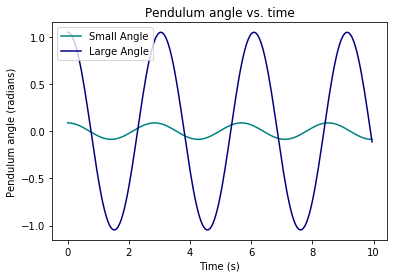

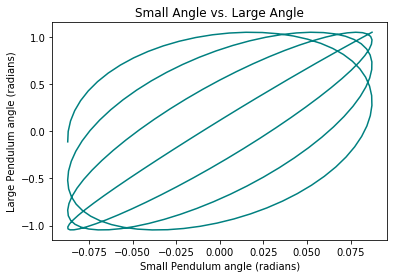

In [113]:
# Create the a new time array for the solution. 
# This code is included so that you can change the time period you find the solution over.
tend = 10
time = arange(0.0,tend,delta_t)

start_angle_degrees = 5
start_angle_radians = start_angle_degrees*pi/180.0
rinit = array([start_angle_radians, 0],float)
r=odeint(deriv, rinit, time)

small_angle_solution = r[:,0].copy()

start_angle_degrees = 60
start_angle_radians = start_angle_degrees*pi/180.0
rinit = array([start_angle_radians, 0],float)
r=odeint(deriv, rinit, time)

large_angle_solution = r[:,0].copy()

plt.figure()
plt.title('Pendulum angle vs. time')
plt.xlabel('Time (s)')
plt.ylabel('Pendulum angle (radians)')
plt.plot(time, small_angle_solution, color='teal', label= 'Small Angle')
plt.plot(time, large_angle_solution, color='navy', label= 'Large Angle')
plt.legend()

plt.figure()
plt.title('Small Angle vs. Large Angle')
plt.plot(small_angle_solution, large_angle_solution, color='teal')
plt.xlabel('Small Pendulum angle (radians)')
plt.ylabel('Large Pendulum angle (radians)')


You should see that the two pendula (small angle and high angle) get out of phase with one another.  After 20 seconds, the 5-degree pendulum will go through about 7 periods, whereas the 60-degree pendulum, running a bit slower, is closer to 6.5 periods.  A nice way to plot this shift is to plot your high angle solution vs. the small angle solution. **(Optional, but well worth a look at the pretty $\it Lissajous$ pattern).**


## Period of simple pendulum as a function of release angle

Our goal is to determine how the period of a pendulum changes as a function of its maximum angle. However, it's rather inconvenient to determine the period manually, so in the last exercise we'll streamline our code and determine the periods automatically.  You'll learn a technique that will be immensely helpful in future lab endeavors, because you can modify it to find peaks in a data set, or use it to count zero-crossing in an interferogram, etc.

### Zero-Crossing Detector
To do this, we introduce a handy function that captures the indices of a 1-dimensional array at the points at which the values go from positive to negative (or touch 0).  Because the angle of the pendulum swings through +$\rightarrow$- once per period, we can use this function to capture these negative-going zero crossings. Multiply by delta_t and we've got the period.  You may find use for this sort of crossing detector later in some real labs, where a simple modification could be used to find peaks in a data set.  

Look carefully through the code in the next two cells. If you are having trouble interpreting what is happening in neg_crossing, try adding print statements (e.g. print(pos)) between the lines, and then rerunning the two cells.

In [114]:
def neg_crossings(data):  #a simple function to capture the negative
    #zero crossings (or touchings) in the y(t) dataset
    
    pos = data > 0 #for each element of the array, mark true if > 0 (this is a logical test)
    npos=~pos #and mark false if not positive, i.e. if <= 0. 
            # The tilde operator for integrers works such that ~x is equivalent to (-x) - 1.
            # For binary data, (True/False) like what is contained in pos, it will reverse the values 
            # so that all True values will become False and visa versa.
    
    #lop off the last pos element and the first npos element to align with equal lengths (shorter by 1):
    lop_pos = pos[:-1] #lop_pos takes all of pos, lopping off the last element
    lop_npos = npos[1:] #lop_npos takes all of npos, lopping off the first element
    
    #Then if the lop_pos and the lop_npos at some index are both true (that's a logical AND, which is &)
    #there must be a zero crossing in going from positive to negative.
    #Use the .nonzero method to pick out and return the indices of data which 
    #have the neg-going zero crossings:
    return((lop_pos & lop_npos)).nonzero()[0]

In [115]:
#Typical use of the neg_crossings() function:
test_data = array([0, 1, 2, 3, -2, 1, -1, -2, -3,6, 5, 4,-3, 2, 1,0, -3])
zc_indices = neg_crossings(test_data)
print('The indices of the negative zero crossings: ',zc_indices)
#Now if we offset the indices in a similar way, we can get the index difference between neighboring zero crossings
diffs = zc_indices[1:]-zc_indices[:-1]
print('Differences between neighboring zero crossings:  ',diffs)
print('Mean difference between indices:  ',average(diffs))


The indices of the negative zero crossings:  [ 3  5 11 14]
Differences between neighboring zero crossings:   [2 6 3]
Mean difference between indices:   3.6666666666666665


#### Exercise 4.6
Putting it all together:  

1. Plot the period as a function of angle from 1 to 89 degrees (no damping) in 1 degree steps. Our time step of 0.05 is probably a little coarse for this exercise, and we have been finding only about 4 zero crossings in our 10 second-long time array. You'll want to use a finer time step (your choice) and a longer time range (again, your choice), so that you can create this plot of period vs. angle.  Show the angle in degrees.

2. Create a second plot that normalizes the period by the small-angle value T0 (which should be what you found in Exercise 3.1).

3. Find the angle at which the period has increased by 10% over its small angle value.  You may find the Python find() method useful:  given an array arr, the indices of all the elements greater than or equal to 15 is given by find(arr > 15)
    
*** Angle (in degrees) at which the period is 10% greater than its small angle period = ***

In [116]:
#Illustration of find() method
arr = 2.6*arange(0.0,12.0,1)
print("The array:  ",arr)
print("The indices for which the elements are >= 15:  ",find(arr >= 15))
print("The index of the first element that is > = 15:  ",find(arr >=15)[0])
print("The value of the first element that is > = 15:  ",arr[find(arr >=15)[0]])

# store the r values for each angle


The array:   [ 0.   2.6  5.2  7.8 10.4 13.  15.6 18.2 20.8 23.4 26.  28.6]
The indices for which the elements are >= 15:   [ 6  7  8  9 10 11]
The index of the first element that is > = 15:   6
The value of the first element that is > = 15:   15.600000000000001


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: The find function was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: The find function was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  """
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: MatplotlibDeprecationWarning: The find function was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  


In [117]:
#And to speed things along here, here is an example loop to print the period of the simple pendulum at different angles.
for pendulum_angle in range(1,80,4):  #jump along every 4 degrees, starting from 1
    start_angle_radians = pendulum_angle*pi/180.0
    rinit = array([start_angle_radians, 0],float)
    r=odeint(deriv, rinit, time)
    zc = neg_crossings(r[:,0])
    diffs = zc[1:]-zc[:-1]
    
    print("Angle = ",pendulum_angle)
    print(diffs, delta_t*average(diffs))

Angle =  1
[56 57 57] 2.8333333333333335
Angle =  5
[56 57 57] 2.8333333333333335
Angle =  9
[57 56 57] 2.8333333333333335
Angle =  13
[57 57 57] 2.85
Angle =  17
[57 57 57] 2.85
Angle =  21
[57 57 58] 2.866666666666667
Angle =  25
[57 58 57] 2.866666666666667
Angle =  29
[58 57 58] 2.8833333333333333
Angle =  33
[58 58 58] 2.9000000000000004
Angle =  37
[58 59 58] 2.916666666666667
Angle =  41
[59 58 59] 2.9333333333333336
Angle =  45
[59 59 59] 2.95
Angle =  49
[60 59 60] 2.9833333333333334
Angle =  53
[60 60 60] 3.0
Angle =  57
[60 61 60] 3.016666666666667
Angle =  61
[61 61 61] 3.0500000000000003
Angle =  65
[62 61] 3.075
Angle =  69
[62 63] 3.125
Angle =  73
[63 64] 3.1750000000000003
Angle =  77
[64 64] 3.2


69


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:39: MatplotlibDeprecationWarning: The find function was deprecated in Matplotlib 2.2 and will be removed in 3.1.


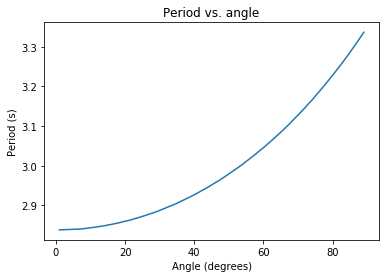

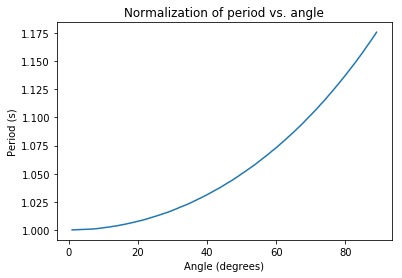

In [125]:
# <Exercise 4.6 >
delta_t = 0.005   
tend = 40
time = arange(0.0,tend,delta_t)


rvals = []
tvals = []
t0 = 2*pi*sqrt(length/g)

for pendulum_angle in range(1,90,1): 
    start_angle_radians = pendulum_angle*pi/180.0
    rinit = array([start_angle_radians, 0],float)
    r=odeint(deriv, rinit, time)
    zc = neg_crossings(r[:,0])
    diffs = zc[1:]-zc[:-1]
    
    rvals.append(pendulum_angle)
    tvals.append(delta_t*average(diffs))
    

    

plt.figure()
plt.title('Period vs. angle')
plt.plot(rvals, tvals)
plt.xlabel('Angle (degrees)')
plt.ylabel('Period (s)')

# normalize it
plt.figure()
plt.title('Normalization of period vs. angle')
plt.plot(rvals, tvals/t0)
plt.xlabel('Angle (degrees)')
plt.ylabel('Period (s)')


t = np.array(tvals, dtype=float)
print( find(t >= 1.1*2.83)[0]+1)


## Check-out
### Exercise 4.7

Briefly summarize in the cell below the ideas of today's lab. **Use a Markdown cell to enter text and discussion.**

We learned how to describe the motion of a pendulum in terms of ordinary differential equations, and how to solve and plot them without using Euler's method. We got better at Python and the use of ODE and find() function.

## Challenge Problems
### Exercise 4.8 (optional)

If there's enough time, we ought to take a peek at the effect of small damping.  

Verify, by direct substitution, that the solution to this equation of motion: 
$\frac{d v}{dt}=-\gamma v$

is a velocity that decays exponentially in time, like so:

$v(t)=v_{0}e^{-\gamma t}$.

Given a damping parameter of $\gamma$ = 0.05, when might the velocity be expected to fall to its 1/e point?

At what time will $v_{0}\frac{1}{e} \approx \mathrm{0.37}v_{0}$ ?

** Staple your work to the lab you turn in.**
Returning to your small-angle pendulum result, *** repeat the 4 plots of Exercise 4.3 and describe what you see.***

*** In what part of the motion is the energy loss the greatest? ***  You might want to zoom in on a few cycles of the
plot.  Because the *average* rate of energy loss goes as $F\cdot v$ = $\gamma v^2$ = $\gamma \frac{\langle KE\rangle}{m}$, you might compare your plot to TE[0] $e^{-(\gamma/m) t}$